We will import the libraries we will be using.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

I will be using  Sklearn's internal datasets as my chosen dataset.More information on the dataset can be found here:https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [3]:
data.feature_names #these are our variables or features that we will use to make predictions 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
data.target[:10] #this is our target or what we are trying to predict, in this case progression of the disease(daibetes)

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

Let's turn the dataset into a dataframe.

In [5]:
My_data = pd.DataFrame(data.data, columns=data.feature_names)
My_data['diabetes_progression'] = data.target

In [6]:
My_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [8]:
# split data into X and y
y = My_data['diabetes_progression']
X = My_data.drop('diabetes_progression',axis=1)

Now that we have split our data , let's do some simple preprocessing.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# define the model 
model = LinearRegression()

# fit the model 
model.fit(X_train, y_train)

# get predictions on the test set 
siya_pred = model.predict(X_test)


In [28]:
siya_pred #Actual Predictions

array([ 80.37743405, 154.13881696, 201.17659864, 100.97665142,
       144.22485916, 125.45343296, 144.41407285, 120.73005598,
        79.16546232,  79.83399172, 269.46080225, 119.64130996,
       122.28619408, 180.68871998,  82.55870564, 156.05593405,
       152.91463473, 221.30154267, 148.28926059,  55.88879865,
        72.93665157, 153.6485483 , 182.07463361, 178.95274572,
       152.22860575, 207.48376783, 156.51569391, 171.06267153,
       211.92461104, 162.53905369, 194.59321425, 104.9941906 ,
       116.23586814, 162.86325038, 126.28032586, 139.51306446,
       113.44380492, 152.6409348 , 201.75398791, 122.57310081,
       155.32704413, 113.30145582, 174.73796203, 147.94234096,
       162.8228344 , 126.59597476,  69.8764741 , 173.13527257,
       166.15649001,  66.77505657, 102.157435  , 214.63044481,
        62.54146889,  72.67862399, 111.77897798, 157.33372409,
       160.74116078,  79.12155222, 219.13117791, 188.5695919 ,
       170.06010909, 182.26555249, 131.99504303, 186.30

We can now  plot actual vs predicted y values.

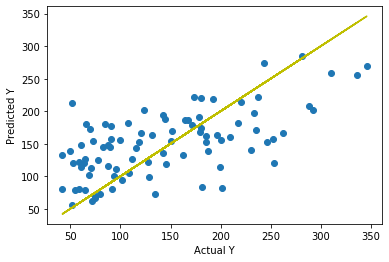

In [26]:
plt.scatter(y_test,siya_pred) 
plt.plot(y_test,y_test,"y") 
plt.ylabel("Predicted Y")
plt.xlabel("Actual Y")
plt.show()

The yellow line shows the perfect model line. The blue dots are the actual predictions.As we can see the model performs pretty well.

I did not include the MSE score or a matrix as it was not required.